Amplitude=0.004794598973847015, Angular freq.=0.02507075558304637, phase=-0.6725911333383138, offset=0.0034366966267257507, Max. Cov.=[[ 2.74446006e-07 -1.15358638e-06  1.03105847e-04 -3.03442824e-07]
 [-1.15358638e-06  5.21492470e-06 -4.66192168e-04  1.34647045e-06]
 [ 1.03105847e-04 -4.66192168e-04  4.21055893e-02 -1.20347560e-04]
 [-3.03442824e-07  1.34647045e-06 -1.20347560e-04  3.55257996e-07]]
Errore Amp
0.0005238759452884954
Errore freq
0.0022836209623235556
Errore phase
0.20519646502424754
Errore offset
0.0005960352307610588
Amplitude=0.0046273020877236545, Angular freq.=0.02591436266246749, phase=0.7257974526200837, offset=-0.0036928657138179085, Max. Cov.=[[ 1.52635201e-07 -7.05807221e-07 -6.22116230e-05  1.69651926e-07]
 [-7.05807221e-07  3.58713063e-06  3.16479494e-04 -8.44212001e-07]
 [-6.22116230e-05  3.16479494e-04  2.82772867e-02 -7.44546215e-05]
 [ 1.69651926e-07 -8.44212001e-07 -7.44546215e-05  2.04165997e-07]]
Errore Amp
0.00039068555209262297
Errore freq
0.001893972

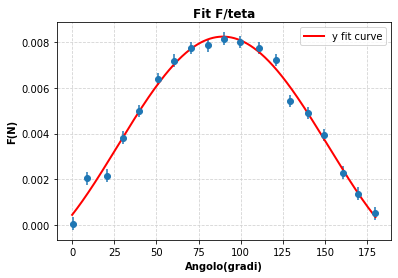

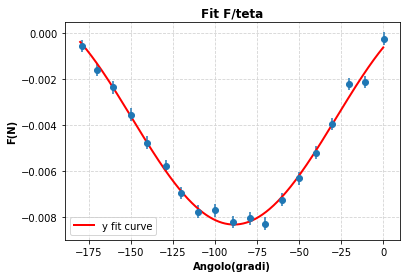

Amplitude=0.00805996841981437, Angular freq.=0.017532364661790437, phase=-0.005570040197540946, offset=-2.3904501510639247e-05, Max. Cov.=[[ 8.48915171e-09  2.05233296e-09  4.94540336e-09  2.85984201e-12]
 [ 2.05233296e-09  9.04466068e-09  3.40347268e-09 -5.38878984e-12]
 [ 4.94540336e-09  3.40347268e-09  1.10414283e-04  4.45729998e-09]
 [ 2.85984201e-12 -5.38878984e-12  4.45729998e-09  3.78716592e-09]]
Errore Amp
9.213659267155552e-05
Errore freq
9.510342098870295e-05
Errore phase
0.010507820095196338
Errore offset
6.153995383909996e-05


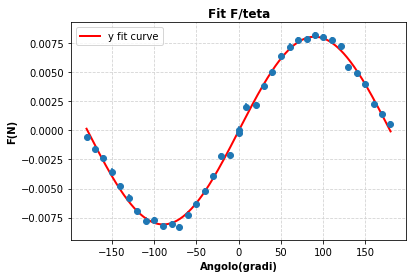

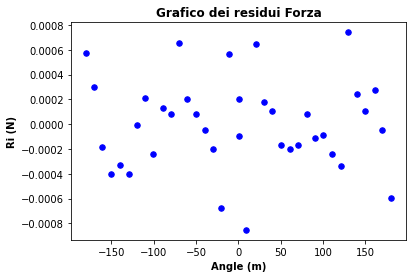

sigma_post_fit
0.0003686601964047036


In [103]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

def fit_sin(tt, yy):
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = np.array(tt)
    yy = np.array(yy)
    ff = np.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(np.fft.fft(yy))
    guess_freq = abs(ff[np.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    guess_amp = np.std(yy) * 2.**0.5
    guess_offset = np.mean(yy)
    guess = np.array([guess_amp, 2.*np.pi*guess_freq, 0., guess_offset])

    def sinfunc(t, A, w, p, c):  return A * np.sin(w*t + p) + c
    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    A, w, p, c = popt
    f = w/(2.*np.pi)
    fitfunc = lambda t: A * np.sin(w*t + p) + c
    return {"amp": A, "omega": w, "phase": p, "offset": c, "freq": f, "period": 1./f, "fitfunc": fitfunc, "cov": pcov, "rawres": (guess,popt,pcov)}



F = np.array([0,0.001405855646,0.00276899508,0.004048,0.005204008488,0.006201895811,0.007011341669,0.007607751458,0.007973003568,0.008096,0.007973003568,0.007607751458,0.007011341669,0.006201895811,0.005204008488,0.004048,0.00276899508,0.001405855646,0])
#sto considerando un errore di 0.014*2 forse è da mettere 0.03*2 ma poi il grafico
#viene sballato, e non sono errori massimi da dividere per 3 ma sigma visto
#che sono ricavati dalle sigma post_fit della taratura, quindi forse l'errore
#che ci dobbiamo aspettare è di 0.014 su ogni misura
F = F-np.random.normal(0, 0.028*0.0098, 19)
#per il fit aggiungere F qui sotto decommentando
#F = np.array([0,0.001405855646,0.00276899508,0.004048,0.005204008488,0.006201895811,0.007011341669,0.007607751458,0.007973003568,0.008096,0.007973003568,0.007607751458,0.007011341669,0.006201895811,0.005204008488,0.004048,0.00276899508,0.001405855646,0])
F_err = np.ones(19)*0.0002744
Angle = np.arange(0,181,10)
#per il fit commentare questa riga
Angle = Angle-np.random.normal(0, 0.5, 19)
Angle_err = np.ones(19)*0.5


fig = plt.figure()
ax = fig.gca()

plt.title("Fit F/teta",fontweight="bold")
plt.xlabel("Angolo(gradi)",fontweight="bold")
plt.ylabel("F(N)",fontweight="bold")

plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.errorbar(Angle, F, xerr=Angle_err, yerr=F_err, fmt='o')





res = fit_sin(Angle, F)
print( "Amplitude=%(amp)s, Angular freq.=%(omega)s, phase=%(phase)s, offset=%(offset)s, Max. Cov.=%(cov)s" % res )
err = np.sqrt(np.diag(res["cov"]))
print("Errore Amp")
print(err[0])
print("Errore freq")
print(err[1])
print("Errore phase")
print(err[2])
print("Errore offset")
print(err[3])

x = np.linspace(0,180,1000)

plt.plot(x, res["fitfunc"](x), "r-", label="y fit curve", linewidth=2)
plt.legend(loc="best")







F2 = np.array([0,0.001405855646,0.00276899508,0.004048,0.005204008488,0.006201895811,0.007011341669,0.007607751458,0.007973003568,0.008096,0.007973003568,0.007607751458,0.007011341669,0.006201895811,0.005204008488,0.004048,0.00276899508,0.001405855646,0])
#per il fit commentare le prossime 2 righe
F2 = F*-1
F2 = F2-np.random.normal(0, 0.028*0.0098, 19)
#per il fit aggiungere F qui sotto decommentando
#F2 = np.array([0,0.001405855646,0.00276899508,0.004048,0.005204008488,0.006201895811,0.007011341669,0.007607751458,0.007973003568,0.008096,0.007973003568,0.007607751458,0.007011341669,0.006201895811,0.005204008488,0.004048,0.00276899508,0.001405855646,0])
F_err = np.ones(19)*0.0002744
Angle2 = np.arange(0,-181,-10)
#per il fit commentare questa riga
Angle2 = Angle2-np.random.normal(0, 0.5, 19)
Angle_err = np.ones(19)*0.5
res = fit_sin(Angle2, F2)
print( "Amplitude=%(amp)s, Angular freq.=%(omega)s, phase=%(phase)s, offset=%(offset)s, Max. Cov.=%(cov)s" % res )
err = np.sqrt(np.diag(res["cov"]))
print("Errore Amp")
print(err[0])
print("Errore freq")
print(err[1])
print("Errore phase")
print(err[2])
print("Errore offset")
print(err[3])

fig = plt.figure()
ax = fig.gca()

plt.title("Fit F/teta",fontweight="bold")
plt.xlabel("Angolo(gradi)",fontweight="bold")
plt.ylabel("F(N)",fontweight="bold")

plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.errorbar(Angle2, F2, xerr=Angle_err, yerr=F_err, fmt='o')


x = np.linspace(0,-180,1000)

plt.plot(x, res["fitfunc"](x), "r-", label="y fit curve", linewidth=2)
plt.legend(loc="best")
plt.show()


Ftot = np.concatenate([F,F2])
#per il fit aggiungere F qui sotto decommentando
#F2 = np.array([0,0.001405855646,0.00276899508,0.004048,0.005204008488,0.006201895811,0.007011341669,0.007607751458,0.007973003568,0.008096,0.007973003568,0.007607751458,0.007011341669,0.006201895811,0.005204008488,0.004048,0.00276899508,0.001405855646,0])
F_err = np.concatenate([F_err,F_err])
#per il fit commentare questa riga
Angletot = np.concatenate([Angle,Angle2])
Angle_err = np.ones(38)*0.5

res = fit_sin(Angletot, Ftot)
print( "Amplitude=%(amp)s, Angular freq.=%(omega)s, phase=%(phase)s, offset=%(offset)s, Max. Cov.=%(cov)s" % res )
err = np.sqrt(np.diag(res["cov"]))
print("Errore Amp")
print(err[0])
print("Errore freq")
print(err[1])
print("Errore phase")
print(err[2])
print("Errore offset")
print(err[3])

fig = plt.figure()
ax = fig.gca()

plt.title("Fit F/teta",fontweight="bold")
plt.xlabel("Angolo(gradi)",fontweight="bold")
plt.ylabel("F(N)",fontweight="bold")

plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.errorbar(Angletot, Ftot, xerr=Angle_err, yerr=F_err, fmt='o')


x = np.linspace(-180,180,1000)
A = res["amp"]
phi = res["phase"]
c = res["offset"]
w = res["omega"]


Ff = res["fitfunc"](Angletot)
plt.plot(x, res["fitfunc"](x), "r-", label="y fit curve", linewidth=2)

plt.legend(loc="best")
plt.show()





Ri = Ff-Ftot

fig = plt.figure()
ax = fig.gca()
plt.title("Grafico dei residui Forza",fontweight="bold")
plt.xlabel("Angle (m)",fontweight="bold")
plt.ylabel("Ri (N)",fontweight="bold")
plt.plot(np.linspace(0,0.1,1000),np.zeros(1000))
plt.scatter(Angletot,Ri, s=30, color='blue',zorder=3)

plt.show()


sigma_post_fit = (np.sum((Ff-Ftot)**2)/(len(Ff)-2))**(1/2)
print("sigma_post_fit")
print(sigma_post_fit)

